In [4]:
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fmin_bfgs
from sklearn.metrics import accuracy_score
from scipy.optimize import minimize
import scipy.io
from scipy.special import expit, logit

# Machine Learning Online Class - Exercise 5 | Regularized Linear Regression and Bias-Variance

# Part 1: Loading and Visualizing Data

In [5]:
print('Loading and Visualizing Data ...\n')

#% Load from ex5data1: 
#% You will have X, y, Xval, yval, Xtest, ytest in your environment
mat = scipy.io.loadmat('ex5data1.mat')

X = mat['X']
y = mat['y']

X_test = mat['Xtest']
y_test = mat['ytest']

X_val = mat['Xval']
y_val = mat['yval']

print("X.shape: ", X.shape, "\ny.shape: ", y.shape,"\n")
print("X_test.shape: ", X_test.shape, "\ny_test.shape: ", y_test.shape, "\n")
print("X_val.shape: ", X_val.shape, "\ny_val.shape: ", y_val.shape)
#% m = Number of examples
m = X.shape[0]

Loading and Visualizing Data ...

X.shape:  (12, 1) 
y.shape:  (12, 1) 

X_test.shape:  (21, 1) 
y_test.shape:  (21, 1) 

X_val.shape:  (21, 1) 
y_val.shape:  (21, 1)


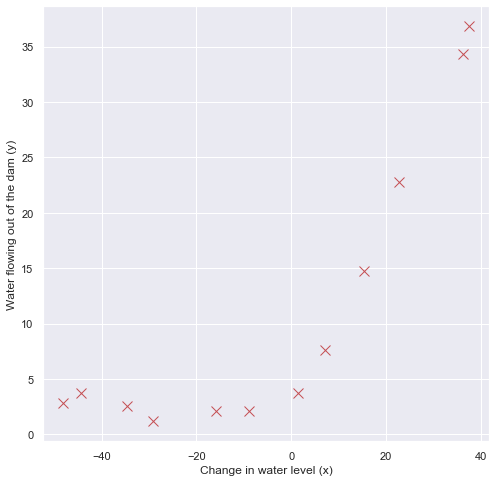

In [6]:
plt.figure(figsize=(8,8))
plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show() 

# Part 2: Regularized Linear Regression Cost

In [7]:
def linearRegCostFunction(X, y, theta, lambda_):
    #% Initialize some useful values
    m = len(y) #% number of training examples

    #% You need to return the following variables correctly 
    
    #grad = np.zeros(len(theta))
    
    h = np.dot(X, theta)
    h = h.reshape((h.shape[0], 1))
    u = lambda_/(2*m)
    t = 1/(2*m)
    theta[0] = 0

    J = t*np.sum(np.square(h - y)) + u*np.dot(theta.T,theta)
    
    c = lambda_*theta
    c = c.reshape((2,1))
    grad = (np.dot(X.T,(h - y)) + c)*(1/m)
    
    return J, grad.flatten()
    
    
    

In [8]:
theta = np.array([1 , 1])
lambda_ = 1
X_= np.c_[np.ones((m, 1)), X]
J, grad = linearRegCostFunction(X_, y, theta, lambda_)

print('Cost at theta = [1 ; 1]: {}\n(this value should be about 303.993192)\n'.format(J))

print('Program paused. Press enter to continue.\n')

Cost at theta = [1 ; 1]: 303.9931922202643
(this value should be about 303.993192)

Program paused. Press enter to continue.



# Part 3: Regularized Linear Regression Gradient

In [9]:
theta = np.array([1 , 1])
J, grad = linearRegCostFunction(X_, y, theta, 1)

print('Gradient at theta = [1 ; 1]:  [{}; {}]\n(this value should be about [-15.303016; 598.250744])\n'.format(grad[0], grad[1]))

Gradient at theta = [1 ; 1]:  [-15.303015674201186; 598.2507441727034]
(this value should be about [-15.303016; 598.250744])



# Part 4: Train Linear Regression

In [10]:
import scipy.optimize as opt

def trainLinearReg(X, y, lambda_):
    

    method='L-BFGS-B'
    maxiter=200
    # Initialize Theta
    #initial_theta = np.zeros(X.shape[1])
    initial_theta = np.zeros((X.shape[1], 1))
    
    costFunction = lambda t: linearRegCostFunction(X, y, t, lambda_)

    result = minimize(costFunction, initial_theta,
                      method=method, jac=True,
                      options={'disp': True,
                               'maxiter': maxiter})

    
    return result.x

##############################################
##############################################
def linearRegCostFunction2(X, y, theta, lambda_val, return_grad=False):
    #LINEARREGCOSTFUNCTION Compute cost and gradient for regularized linear 
    #regression with multiple variables
    #   [J, grad] = LINEARREGCOSTFUNCTION(X, y, theta, lambda_val) computes the 
    #   cost of using theta as the parameter for linear regression to fit the 
    #   data points in X and y. Returns the cost in J and the gradient in grad

    # Initialize some useful values
    m = len(y) # number of training examples

    # force to be 2D vector
    theta = np.reshape(theta, (-1,y.shape[1]))

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost and gradient of regularized linear 
    #               regression for a particular choice of theta.
    #
    #               You should set J to the cost and grad to the gradient.
    #

    # cost function
    J = ( 1./(2*m)) * np.power( (np.dot(X, theta) - y) , 2).sum() + ( float(lambda_val) / (2*m)) * np.power(theta[1:theta.shape[0]],2).sum()

    # regularized gradient
    grad = (1./m) * np.dot( X.T, np.dot(X,theta) - y) + ( float(lambda_val) / m )*theta

    # unregularize first gradient
    grad_no_regularization = (1./m) * np.dot( X.T, np.dot(X,theta) - y)
    grad[0] = grad_no_regularization[0]

    if return_grad == True:
        return J[0], grad.flatten()
    elif return_grad == False:
        return J[0] 

    
def trainLinearReg2(X, y, lambda_val):
    #TRAINLINEARREG Trains linear regression given a dataset (X, y) and a
    #regularization parameter lambda_val
    #   [theta] = TRAINLINEARREG (X, y, lambda_val) trains linear regression using
    #   the dataset (X, y) and regularization parameter lambda_val. Returns the
    #   trained parameters theta.
    #

    # Initialize Theta
    initial_theta = np.zeros((X.shape[1], 1))

    # Short hand for cost function to be minimized
    costFunc = lambda theta: linearRegCostFunction2(X, y, theta, lambda_val, True)
    # Now, costFunction is a function that takes in only one argument
    maxiter = 200
    results = minimize(costFunc, x0=initial_theta,
                       options={'disp': True, 'maxiter':maxiter},
                       method="L-BFGS-B",
                       jac=True)

    theta = results["x"]

    return theta


[0.         0.25391636]


Text(0, 0.5, 'Water flowing out of the dam (y)')

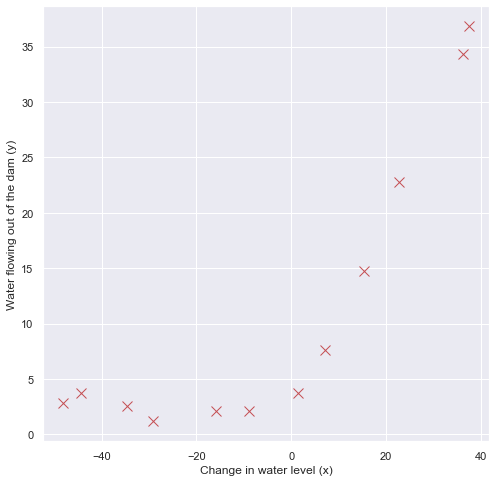

In [11]:
#%  Train linear regression with lambda = 0

###theta = np.array([13.08790, 0.36778])
lambda_ = 0
theta = trainLinearReg(np.c_[np.ones((m, 1)), X], y, lambda_)
print(theta)

#%  Plot fit over the data
plt.figure(figsize=(8,8))
plt.plot(X, y, 'rx', MarkerSize =10, LineWidth=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')


# Part 5: Learning Curve for Linear Regression

In [9]:
def learningCurve(X, y, Xval, yval, lambda_):
    
    m = len(X)

    # You need to return these values correctly
    error_train = np.zeros((m, 1))
    error_val   = np.zeros((m, 1))
    
    for i in range(1, m+1):
     #Compute train/cross validation errors using training examples 
      #X(1:i, :) and y(1:i), storing the result in 
      #error_train(i) 
      # error_val(i)
        X_train = X[:i]
        y_train = y[:i]
        
        theta = trainLinearReg2(X_train, y_train, lambda_)
        
        
        error_train[i-1] = linearRegCostFunction2(X_train, y_train, theta, 0)
        error_val[i-1] = linearRegCostFunction2(Xval, yval, theta, 0)
    
    
    return error_train, error_val
    
    

In [10]:
lambda_ = 0
Xx = np.c_[np.ones((m,1)), X]
Xv = np.c_[np.ones((X_val.shape[0],1)), X_val]

error_train, error_val = learningCurve(Xx, y, Xv, y_val, lambda_)


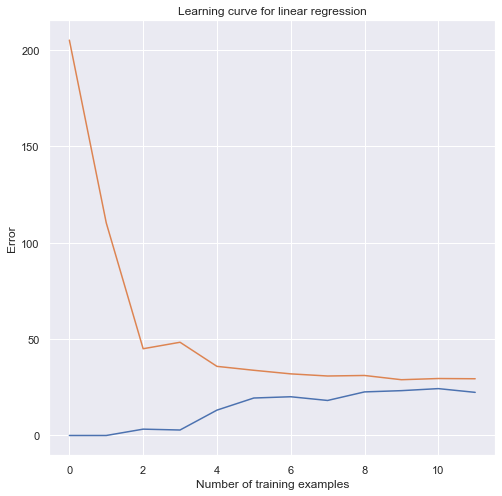

In [11]:
plt.figure(figsize=(8,8))
plt.title('Learning curve for linear regression')
#plt.legend((p1, p2), ('Train', 'Cross Validation'), numpoints=1, handlelength=0.5)
plt.plot([i for i in range(m)], error_train, [i for i in range(m)], error_val)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.show(block=False)

In [12]:
print('# Training Examples\tTrain Error\tCross Validation Error\n')
for i in range(m):
    print('{}\t|\t{}\t|\t{}'.format(i, error_train[i], error_val[i]))

# Training Examples	Train Error	Cross Validation Error

0	|	[9.86076132e-32]	|	[205.12109575]
1	|	[1.42981039e-30]	|	[110.30036611]
2	|	[3.28659505]	|	[45.01023138]
3	|	[2.84267769]	|	[48.36891145]
4	|	[13.15404881]	|	[35.86516475]
5	|	[19.44396251]	|	[33.8299616]
6	|	[20.09852166]	|	[31.9709858]
7	|	[18.1728587]	|	[30.86244632]
8	|	[22.60940542]	|	[31.13599796]
9	|	[23.26146159]	|	[28.93620747]
10	|	[24.31724959]	|	[29.55143162]
11	|	[22.3739065]	|	[29.43381813]


# Part 6: Feature Mapping for Polynomial Regression

In [13]:
from sklearn.preprocessing import StandardScaler


def polyFeatures(X, p):
    
    X_poly = np.zeros((len(X), p))
    X_poly[:,0] = X.flatten("F")
    
    for i in range(1, p):
        X_poly[:,i] = (X*X_poly)[:,i-1]
    
    return X_poly
    
def featureNormalize(X):
    
    scaler = StandardScaler()
    scaler = scaler.fit(X)
    
    mu = scaler.mean_               
    sigma = np.sqrt(scaler.var_)
    X_norm = scaler.transform(X)
    
    return X_norm, mu, sigma
    

In [14]:
def bsxfun(X_poly_test, y, method = None):
    #mu = mu.reshape(1, mu.shape[0])
    
    if method == "minus":
        return X_poly_test-y
    elif method == "rdivide":
        j = []
        for index, item in enumerate(X_poly_test):
            j.append((item/y))
            
            #j.append((item/sigma)[0])

        return j
        
    else:
        return
    
    

In [15]:
p = 8

# Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly)  # Normalize
X_poly = np.c_[np.ones((m, 1)), X_poly]                   # Add Ones


# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(X_test, p)
X_poly_test = bsxfun(X_poly_test, mu, method="minus")
X_poly_test = np.array(bsxfun(X_poly_test, sigma, method="rdivide"))
X_poly_test = np.c_[np.ones((X_poly_test.shape[0], 1)), X_poly_test]         # Add Ones

# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(X_val, p)
X_poly_val = bsxfun(X_poly_val, mu, method="minus")
X_poly_val = np.array(bsxfun(X_poly_val, sigma, method="rdivide"))
#print(X_poly_val.shape)
X_poly_val = np.c_[np.ones((X_poly_val.shape[0], 1)), X_poly_val]    # Add Ones



Hay un error en la presicion de sigma(por python) lo que afecta el resultado, en X_poly[0, :]

In [16]:
print('Normalized Training Example 1:\n')
print('  {}  \n'.format(X_poly[0, :]))
print('\nProgram paused. Press enter to continue.\n')



Normalized Training Example 1:

  [ 1.         -0.3782437  -0.78866232  0.19032872 -0.7375913   0.32025197
 -0.6171516   0.35983501 -0.53109126]  


Program paused. Press enter to continue.



# Part 7: Learning Curve for Polynomial Regression

In [17]:
def polyFeatures2(X, p):

    X_poly = np.zeros((len(X), p))

    for i in range(p):
        X_poly[:, i] = np.power(X, i + 1).ravel()

    return X_poly

def plotFit(min_x, max_x, mu, sigma, theta, p):
    
    #plt.figure(figsize=(8,8))
    x = np.arange(min_x - 15, max_x + 25, 0.05)
    # Map the X values 
    X_poly = polyFeatures2(x, p)
    X_poly = bsxfun(X_poly, mu, method = "minus")
    X_poly = np.array(bsxfun(X_poly, sigma, method = "rdivide"))
    
    X_poly, dummy_mu, dummy_sigma = featureNormalize(X_poly)
    # Add ones
    X_poly = np.c_[np.ones((x.shape[0], 1)), X_poly]
    
    # Plot
    plt.ylim(-100, 200)
    plt.xlim(-100,100)
    plt.plot(x, X_poly.dot(theta), linestyle='--', marker='', color='b')
    

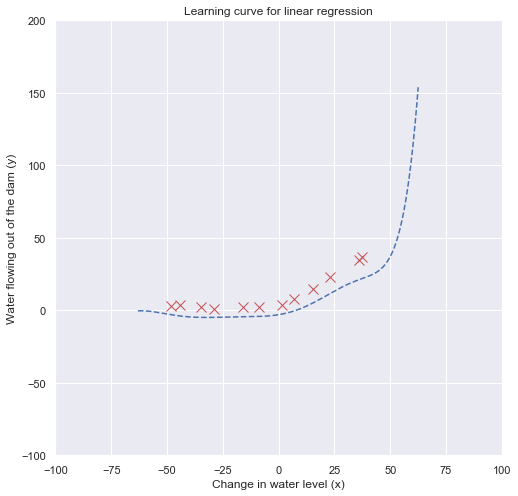

In [18]:

lamb = 0
theta = trainLinearReg2(X_poly, y, lamb)

# Plot training data and fit
plt.figure(figsize=(8,8))
plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plotFit(min(X), max(X), mu, sigma, theta, p)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Learning curve for linear regression'.format(lamb))
plt.show()





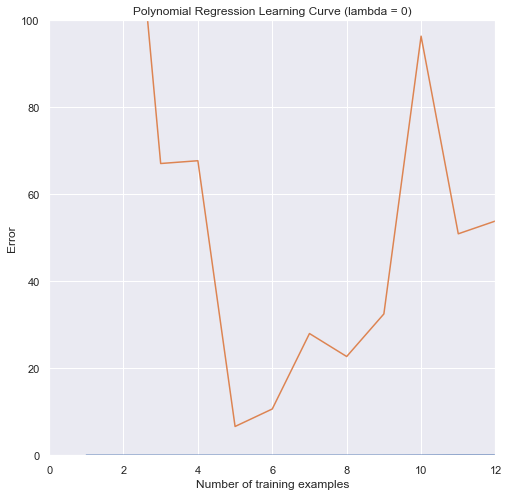

Polynomial Regression (lambda = 0)


# Training Examples	Train Error	Cross Validation Error

 	0		[9.86076132e-32]	[161.44216832]

 	1		[1.99369008e-11]	[160.7923057]

 	2		[2.82649678e-11]	[67.08533418]

 	3		[3.55928001e-12]	[67.72685583]

 	4		[9.09921563e-11]	[6.61700053]

 	5		[6.11101485e-09]	[10.64194768]

 	6		[3.41054063e-10]	[27.99014045]

 	7		[2.45403969e-09]	[22.70463252]

 	8		[0.00025842]	[32.49852007]

 	9		[0.01081939]	[96.36940763]

 	10		[0.03121892]	[50.92140153]

 	11		[0.02889024]	[53.86686587]

Program paused. Press enter to continue.



In [19]:

plt.figure(figsize=(8,8))
error_train, error_val = learningCurve(X_poly, y, X_poly_val, y_val, lamb)
plt.plot(range(1, m+1), error_train, range(1, m+1), error_val)

plt.title('Polynomial Regression Learning Curve (lambda = {})'.format(lamb))
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.xlim(0,12)
plt.ylim(0, 100)
plt.show()

print('Polynomial Regression (lambda = {})\n\n'.format(lamb))
print('# Training Examples\tTrain Error\tCross Validation Error\n')
for i in range(m):
    print(' \t{}\t\t{}\t{}\n'.format(i, error_train[i], error_val[i]))
#########end

print('Program paused. Press enter to continue.\n')

# Part 8: Validation for Selecting Lambda

In [44]:
def validationCurve(X, y, Xval, yval):
    lambda_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
    
    # You need to return these variables correctly.
    error_train = np.zeros((len(lambda_vec), 1))
    error_val = np.zeros((len(lambda_vec), 1))
    
    for i in range(len(lambda_vec)):
        lamb = lambda_vec[i]
        theta = trainLinearReg2(X,y,lamb)
        error_train[i] = linearRegCostFunction2(X   , y   , theta, 0, False)
        error_val[i] = linearRegCostFunction2(Xval, yval, theta, 0, False)

    return lambda_vec, error_train, error_val
    
    

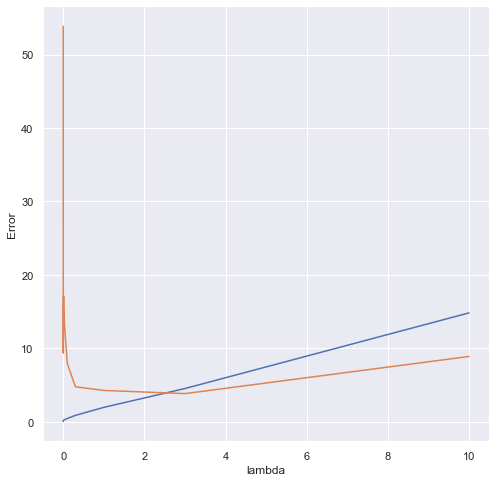

In [46]:
lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, y_val)

plt.figure(figsize=(8,8))
plt.plot(lambda_vec, error_train, lambda_vec, error_val)
plt.xlabel('lambda')
plt.ylabel('Error')
plt.show()


In [47]:

print('lambda\t\tTrain Error\tValidation Error\n')
for i in range(len(lambda_vec)):
    print(' {}\t{}\t{}\n'.format(lambda_vec[i], error_train[i], error_val[i]))

print('Program paused. Press enter to continue.\n')

lambda		Train Error	Validation Error

 0.0	[0.02889024]	[53.86686587]

 0.001	[0.10797679]	[9.3501911]

 0.003	[0.166725]	[15.92259232]

 0.01	[0.21795797]	[17.14931465]

 0.03	[0.27514865]	[13.21618293]

 0.1	[0.4386562]	[7.92682617]

 0.3	[0.86820925]	[4.76073244]

 1.0	[1.95869712]	[4.26345252]

 3.0	[4.52510055]	[3.83218395]

 10.0	[14.82577991]	[8.88969678]

